[다중 분류를 위한 OvR(OvA)]
- 분류 클래스 수만큼 이진 분류기 생성, 다중 분류 진행

In [26]:
# 모듈 로딩
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

[데이터셋 load_digits]
- 내장 이미지 데이터셋
- 8 * 8 크기의 이미지: 1d 64개의 feature
- target: 0 ~ 9 (총 10개의 클래스)

In [27]:
feature_df,target_sr=load_digits(as_frame=True,return_X_y=True)
print(feature_df.shape,feature_df.ndim,target_sr.shape,target_sr.ndim)

(1797, 64) 2 (1797,) 1


In [44]:
#이미지 픽셀: 0~255 범위
feature_df=feature_df/255
feature_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.000077,0.000200,0.000138,0.000015,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000092,0.000200,0.000154,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.000185,0.000200,0.000077,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000169,0.000246,0.000154,0.000000,0.0
2,0.0,0.0,0.000000,0.000062,0.000231,0.000185,0.0,0.0,0.0,0.000000,...,0.000077,0.0,0.0,0.0,0.000000,0.000046,0.000169,0.000246,0.000138,0.0
3,0.0,0.0,0.000108,0.000231,0.000200,0.000015,0.0,0.0,0.0,0.000123,...,0.000138,0.0,0.0,0.0,0.000108,0.000200,0.000200,0.000138,0.000000,0.0
4,0.0,0.0,0.000000,0.000015,0.000169,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000031,0.000246,0.000062,0.000000,0.0


In [29]:
target_sr.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

In [30]:
#이미지 데이터 시각화
import matplotlib.pyplot as plt

In [31]:
#1d => 2d
imgdata=feature_df.iloc[0].to_numpy().reshape(-1,8)
imgdata.shape

(8, 8)

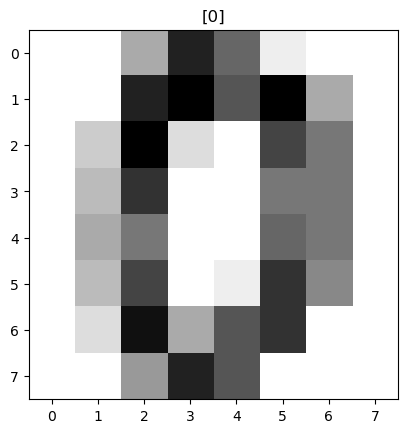

In [32]:
plt.imshow(imgdata,cmap='binary')
plt.title(f'[{target_sr[0]}]')
plt.show()

학습용 데이터셋 준비

In [33]:
x_train,x_test,y_train,y_test=train_test_split(feature_df,target_sr,stratify=target_sr,random_state=10)

In [34]:
x_train.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1347.0,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,...,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,0.0,0.001223,0.020379,0.046305,0.046724,0.022938,0.005366,0.000486,0.000026,0.007837,...,0.014711,0.000821,0.000003,0.001095,0.021713,0.047344,0.046450,0.026851,0.008210,0.001488
std,0.0,0.003652,0.018578,0.016942,0.016569,0.022301,0.013047,0.004006,0.000413,0.012663,...,0.019266,0.003790,0.000107,0.003686,0.019956,0.017419,0.019299,0.023044,0.016206,0.007486
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.003922,0.039216,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003922,0.043137,0.039216,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.015686,0.050980,0.050980,0.015686,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.015686,0.050980,0.054902,0.023529,0.000000,0.000000
75%,0.0,0.000000,0.035294,0.058824,0.058824,0.043137,0.000000,0.000000,0.000000,0.011765,...,0.027451,0.000000,0.000000,0.000000,0.039216,0.062745,0.062745,0.047059,0.007843,0.000000
max,0.0,0.031373,0.062745,0.062745,0.062745,0.062745,0.062745,0.054902,0.007843,0.062745,...,0.062745,0.050980,0.003922,0.035294,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745


[OvR(OvA)]
- 클래스마다 이진 분류기 생성 -> 가장 높은 결정 점수를 낸 클래스 선택

In [35]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [36]:
ovr_clf=OneVsRestClassifier(LogisticRegression(max_iter=1000))  #ovr 수행할 때 어떤 분류기로 할 것인가(여기서는 로지스틱 회귀 사용/knn 등 뭐든 분류기면 쓸 수 있따..!)
ovr_clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [37]:
print(f'ovr_clf.estimators_:{len(ovr_clf.estimators_)}개')
print(f'ovr_clf.classes_:{ovr_clf.classes_}')
print(f'ovr_clf.n_classes_: {ovr_clf.n_classes_}')
print(f'ovr_clf.label_binarizer_:{ovr_clf.label_binarizer_}')

ovr_clf.estimators_:10개
ovr_clf.classes_:[0 1 2 3 4 5 6 7 8 9]
ovr_clf.n_classes_: 10
ovr_clf.label_binarizer_:LabelBinarizer(sparse_output=True)


In [38]:
import numpy as np
np.set_printoptions(precision=6,suppress=True)

In [39]:
for idx in range(ovr_clf.n_classes_):
    print(f'[{idx}분류기]',ovr_clf.estimators_[idx].coef_,ovr_clf.estimators_[idx].intercept_)

[0분류기] [[ 0.       -0.117211 -0.361977  0.637993 -0.259516 -1.280042 -0.549555
  -0.051539 -0.002489 -0.450771  0.87553   0.67567   0.761063  1.421815
  -0.372707 -0.047908 -0.000876  0.483967  1.735262 -0.566662 -1.827955
   2.027963  0.680701 -0.023    -0.000234  1.171667  1.431241 -2.773392
  -4.069452  0.621786  1.751173 -0.001039  0.        1.440423  1.660744
  -3.354668 -4.168379 -0.182033  1.700054  0.       -0.006227  0.753401
   2.703978 -2.235013 -2.415652  1.074093  0.919099 -0.012728 -0.001924
   0.023211  2.278424  0.391211  0.569341  1.801441 -0.651051 -0.079346
  -0.000345 -0.112692 -0.545168  0.615148  0.574332 -0.674338 -0.772614
  -0.134407]] [-2.294685]
[1분류기] [[ 0.       -0.143074 -1.132225 -1.180677 -0.866008  0.169236 -0.195313
  -0.061496 -0.003632 -0.881948 -2.792764  0.176256  1.541474  0.322755
  -0.319918 -0.054061 -0.001149 -0.63731  -1.214654  3.468259  3.133466
  -0.135821 -0.452731 -0.026653 -0.000552 -0.068647  0.070149  2.400616
   1.588896 -0.631002 -0

In [43]:
x_train

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
779,0.0,0.003922,0.050980,0.062745,0.047059,0.003922,0.000000,0.000000,0.0,0.003922,...,0.011765,0.000000,0.0,0.0,0.054902,0.062745,0.043137,0.019608,0.000000,0.0
1566,0.0,0.000000,0.039216,0.062745,0.058824,0.027451,0.000000,0.000000,0.0,0.023529,...,0.003922,0.000000,0.0,0.0,0.043137,0.062745,0.062745,0.031373,0.003922,0.0
837,0.0,0.000000,0.039216,0.062745,0.062745,0.031373,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.035294,0.050980,0.003922,0.000000,0.000000,0.0
732,0.0,0.000000,0.000000,0.023529,0.050980,0.062745,0.062745,0.035294,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.027451,0.035294,0.000000,0.000000,0.0
1656,0.0,0.000000,0.011765,0.035294,0.054902,0.035294,0.000000,0.000000,0.0,0.019608,...,0.000000,0.000000,0.0,0.0,0.007843,0.058824,0.027451,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,0.0,0.000000,0.035294,0.050980,0.027451,0.000000,0.000000,0.000000,0.0,0.000000,...,0.062745,0.007843,0.0,0.0,0.027451,0.047059,0.047059,0.047059,0.043137,0.0
452,0.0,0.000000,0.007843,0.058824,0.050980,0.011765,0.000000,0.000000,0.0,0.000000,...,0.011765,0.000000,0.0,0.0,0.011765,0.047059,0.054902,0.039216,0.000000,0.0
1301,0.0,0.000000,0.000000,0.007843,0.054902,0.003922,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.011765,0.007843,0.062745,0.023529,0.000000,0.0
787,0.0,0.000000,0.015686,0.047059,0.050980,0.011765,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.058824,0.062745,0.043137,0.000000,0.0


In [41]:
ovr_clf.predict_proba(x_train.iloc[:5])

array([[0.079003, 0.090183, 0.098928, 0.145985, 0.079937, 0.134043,
        0.114027, 0.082838, 0.083199, 0.091857],
       [0.061631, 0.101946, 0.113814, 0.203225, 0.048884, 0.107441,
        0.043198, 0.081198, 0.114282, 0.12438 ],
       [0.050931, 0.097982, 0.10079 , 0.120962, 0.089051, 0.083134,
        0.048676, 0.235046, 0.086959, 0.086468],
       [0.070001, 0.099416, 0.048499, 0.083824, 0.156437, 0.093724,
        0.06568 , 0.206879, 0.087048, 0.088492],
       [0.083734, 0.093913, 0.08856 , 0.059756, 0.114046, 0.19491 ,
        0.10396 , 0.101967, 0.089212, 0.069943]])

In [42]:
ovr_clf.predict(x_train.iloc[:5])

array([3, 3, 7, 7, 5])

In [45]:
ovr_clf.predict_proba(x_test.iloc[:1]).argmax()   #가장 높은 확률의 인덱스 반환

3

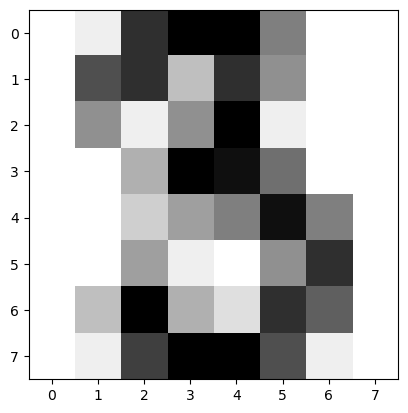

In [47]:
#시각화
import numpy as np
plt.imshow(np.array(x_test.iloc[0]).reshape(-1,8),cmap='binary')
plt.show()